# Regresión Lineal Multi-Variable

En este notebook se analiza el dataset [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/) de la plataforma de Kaggle

## 1. Cargando datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Explorando datos

In [4]:
df_train.shape

(1460, 81)

In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df_train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## 3. Estudio de la variable SalePrice (Valor de Venta)

In [8]:
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.5)

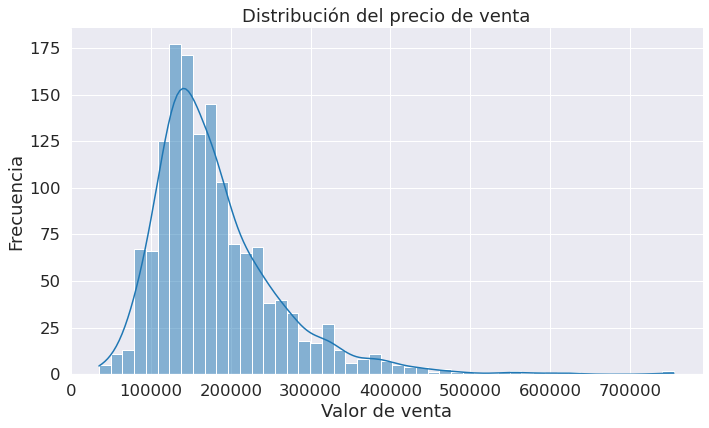

In [9]:
sns.displot(df_train['SalePrice'], kde=True, height=6, aspect=1.7)
plt.title('Distribución del precio de venta')
plt.xlabel('Valor de venta')
plt.ylabel('Frecuencia')
plt.show()

In [10]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Se aprecia claramente en la gráfica anterior que los valores de valor de venta mayores a 500000 se encuentran muy alejados del resto de los valores por lo que veamos cuantos valores se enccuentran en esa sección 

In [11]:
df_train[df_train['SalePrice'] > 500000].count()['SalePrice']

9

Como solo se tienen 9 valores, entonces se ha decidido eliminar estas filas con el fin de tener un menor ruido en los datos para el análisis, con lo que ahora se tiene

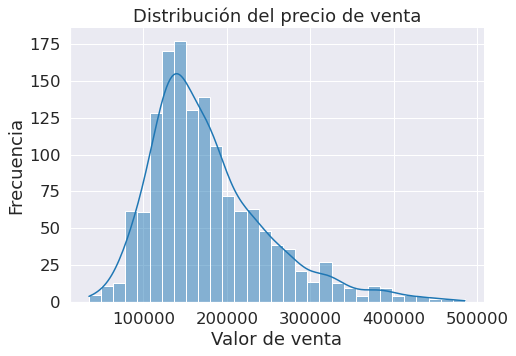

In [12]:
df_train = df_train[df_train['SalePrice'] < 500000]
sns.displot(df_train['SalePrice'], kde=True, height=5, aspect=1.5)
plt.title('Distribución del precio de venta')
plt.xlabel('Valor de venta')
plt.ylabel('Frecuencia')
plt.show()

In [13]:
df_train['SalePrice'].describe()

count      1451.000000
mean     178272.872502
std       71891.119458
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      213000.000000
max      485000.000000
Name: SalePrice, dtype: float64

Para observar la correlación entre las variables númericas se ha realizado el siguiente mapa de calor que representa la matriz de correlación

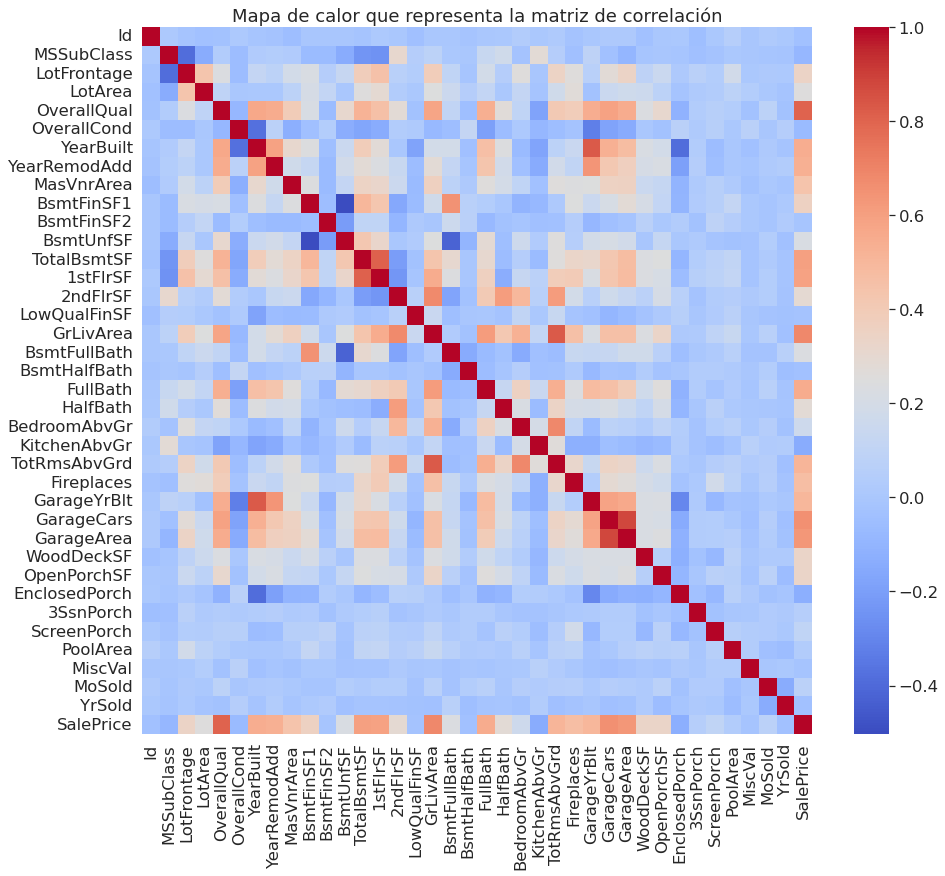

In [14]:
corr_matrix = df_train.corr()
plt.figure(figsize=(15,13))
sns.heatmap(corr_matrix, cmap='coolwarm', cbar=True);
plt.title('Mapa de calor que representa la matriz de correlación')
plt.show()

Con el fin de ver de una mejor forma las menores y mayores correlaciones entre SalePrice y las variables númericas se han filtrado las 10 menores y las 10 mayores

In [15]:
corr_matrix['SalePrice'].sort_values(ascending=True)[0:10]

KitchenAbvGr    -0.142852
EnclosedPorch   -0.129293
MSSubClass      -0.085954
OverallCond     -0.072195
YrSold          -0.036607
BsmtHalfBath    -0.033044
Id              -0.032967
LowQualFinSF    -0.023940
MiscVal         -0.020247
BsmtFinSF2      -0.014028
Name: SalePrice, dtype: float64

In [16]:
corr_matrix['SalePrice'].sort_values(ascending=False)[0:10]

SalePrice       1.000000
OverallQual     0.802424
GrLivArea       0.686872
GarageCars      0.654418
GarageArea      0.633607
TotalBsmtSF     0.596771
1stFlrSF        0.589676
FullBath        0.553014
YearBuilt       0.543898
YearRemodAdd    0.531708
Name: SalePrice, dtype: float64

Como las correlaciones menores son cernacas a 0 y no a menos -1 entonces no se consideran para el análisis, ahora veamos las distribuciones de las 10 correlaciones mayores

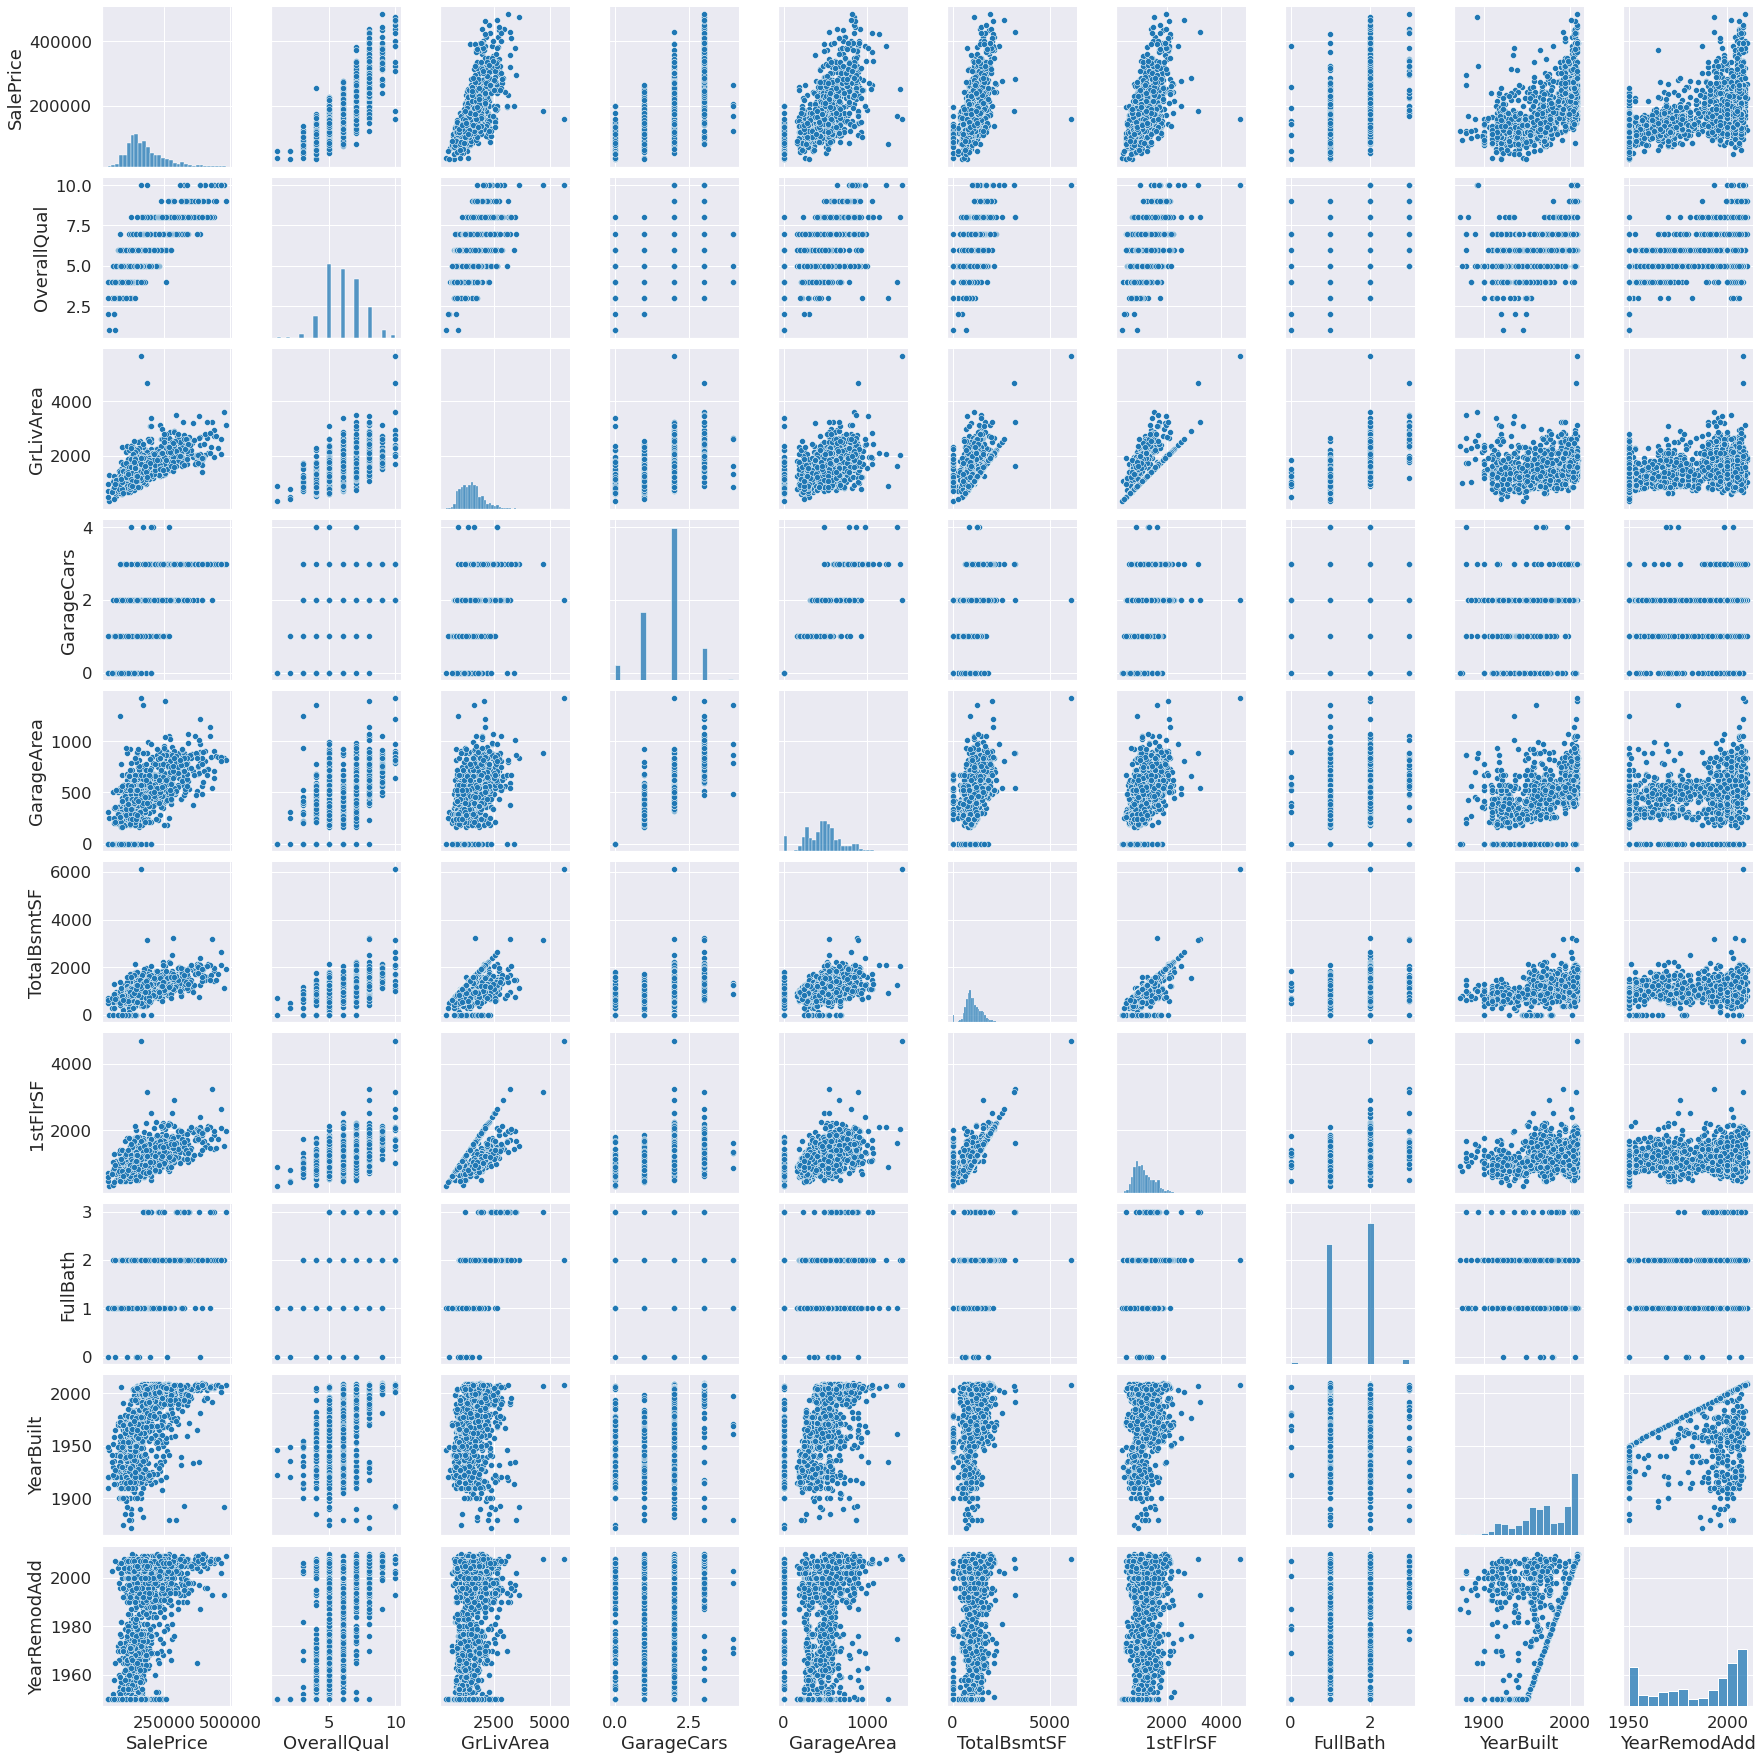

In [18]:
features = list(corr_matrix['SalePrice'].sort_values(ascending=False)[0:10].index)
sns.pairplot(df_train[features])
plt.show()

## 4. Preparando datos 

Para la regresión lineal consideramos las variables 
- GrLivArea: Pies cuadrados de superficie habitable
- GarageArea: Tamaño del garaje en pies cuadrados
- TotalBsmtSF: Pies cuadrados totales del sótano

Primero veamos si estas variables tienen valores nulos

In [17]:
df_train_num_nulos = pd.DataFrame(df_train[['GrLivArea','GarageArea','TotalBsmtSF']].isnull().sum(), columns=['Num-Nulos'])
df_train_num_nulos

,Num-Nulos
GrLivArea,0
GarageArea,0
TotalBsmtSF,0


Veamos individualmente las relaciones entre estas variables y SalePrice

Para GrLivArea se tiene

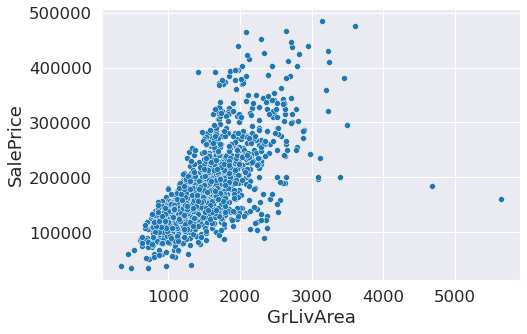

In [18]:
plt.figure(figsize=(7.5,5))
sns.scatterplot(data=df_train, x='GrLivArea', y='SalePrice')
plt.show()

Se observan que los valores de GrLivArea mayores a 4000 se encuentran muy alejados del resto de los valores, por lo tanto se decidió eliminar estas filas con lo que ahora se tiene

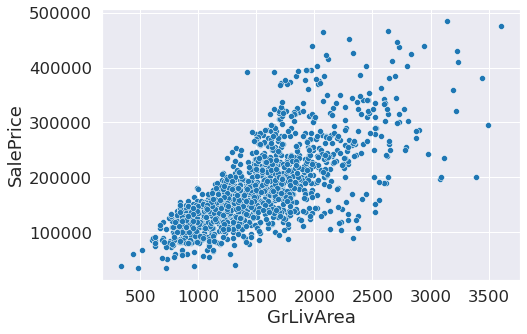

In [19]:
df_train = df_train[df_train['GrLivArea'] < 4000]
plt.figure(figsize=(7.5,5))
sns.scatterplot(data=df_train, x='GrLivArea', y='SalePrice')
plt.show()

Para GarageArea se tiene

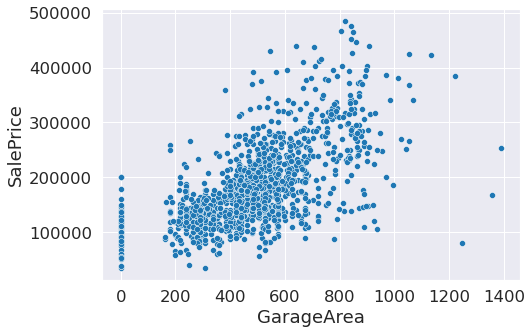

In [20]:
plt.figure(figsize=(7.5,5))
sns.scatterplot(data=df_train, x='GarageArea', y='SalePrice')
plt.show()

Se observan que los valores de GarageArea mayores a 1200 se encuentran muy alejados del resto de los valores, por lo tanto se decidió eliminar estas filas con lo que ahora se tiene

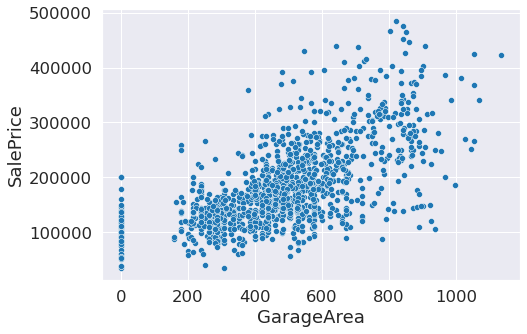

In [21]:
df_train = df_train[df_train['GarageArea'] < 1200]
plt.figure(figsize=(7.5,5))
sns.scatterplot(data=df_train, x='GarageArea', y='SalePrice')
plt.show()



Para TotalBsmtSF se tiene

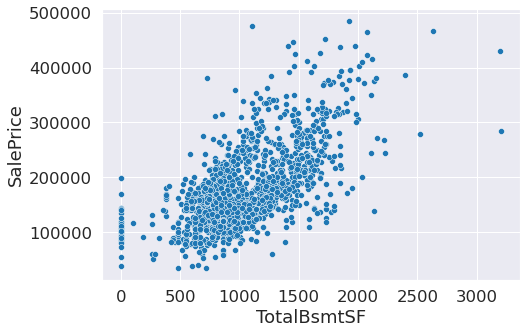

In [24]:
plt.figure(figsize=(7.5,5))
sns.scatterplot(data=df_train, x='TotalBsmtSF', y='SalePrice')
plt.show()

Se observan que los valores de TotalBsmtSF mayores a 2500 se encuentran muy alejados del resto de los valores, por lo tanto se decidió eliminar estas filas con lo que ahora se tiene

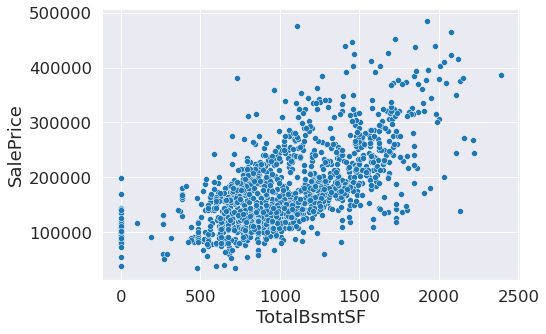

In [22]:
df_train = df_train[df_train['TotalBsmtSF'] < 2500]
plt.figure(figsize=(7.5,5))
sns.scatterplot(data=df_train, x='TotalBsmtSF', y='SalePrice')
plt.show()

# 5. Modelo

In [28]:
from sklearn.linear_model import LinearRegression

x_train = df_train[['GrLivArea','GarageArea','TotalBsmtSF']].values
y_train = df_train['SalePrice'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

## 6. Predicción

Veamos si las variables usadas en el modelos no tienen valores nulos en el dataset de prueba

In [29]:
df_test_num_nulos = pd.DataFrame(df_test[['GrLivArea','GarageArea','TotalBsmtSF']].isnull().sum(), columns=['Num-Nulos'])
df_test_num_nulos

,Num-Nulos
GrLivArea,0
GarageArea,0
TotalBsmtSF,0


Como se tiene un valor nulo en GarageArea y TotalBsmtSF estos valores se han sustituido por el promedio de la columna

In [30]:
df_test['GarageArea'] = df_test['GarageArea'].fillna(df_test['GarageArea'].mean()) 
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean()) 

Haciendo la predicción sobre el dataset de prueba    

In [31]:
x_test = df_test[['GrLivArea','GarageArea','TotalBsmtSF']].values
y_pred = reg.predict(x_test)
y_pred_lon = y_pred.shape[0]    
y_pred = y_pred.reshape(y_pred_lon)

## 7. Evaluación

Para la evaluación correcta del modelo hay que evaluar la predicción sobre el dataset de prueba, para esto hay que enviar los resultados obtenidos a kaggle ya que solo la plataforma conoce los valores de SalePrice del dataset de prueba para esto creamos el DataFrame output como indica la plataforma para poder exportar un archivo csv 

In [32]:
output = pd.DataFrame({'Id': df_test.Id, 'SalePrice': y_pred})
output
output.to_csv('pred.csv', index=False)

Al enviar el arvhico csv a kaggle se obtiene el siguiente resultado

![](eval.png)

Kaggle realiza la evaluación de la predicción mediante la raiz del errror cuadratico medio por lo que la predicción es mejor cuando el Score tiende a 0